In [55]:
import pandas as pd

# Завантаження датасету
file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)

# 1. Вивести перших 5 рядків
titanic_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
# 2. Визначити розмір датасета
titanic_data.shape



(418, 12)

In [57]:
# 3. Визначити тип даних
titanic_data.dtypes



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
# 4. Визначити наявність пропущених значень
titanic_data.isnull().sum()





PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
# Замінити пропущені значення в числових стовпцях на середнє значення
titanic_data['Age'].fillna(titanic_data['Age'].median(skipna=True),inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(skipna=True),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2500\3575189391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(skipna=True),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_2500\3575189391.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [60]:
# 5. Ще раз перевірити наявність пропущених значень
titanic_data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [61]:
# 6. Перевірити наявність дублікатів
titanic_data.duplicated().sum()

# Видалити дублікати, якщо вони є
titanic_data.drop_duplicates(inplace=True)



In [62]:
# 7. Вивести описову статистику датасету
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [63]:

# 8. Видалити стовпчик Cabin
titanic_data.drop(columns=['Cabin'], inplace=True)


In [64]:

# 9. Сформувати датасет з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
titanic_selected = titanic_data[selected_columns]


In [65]:

# 10. Замінити бінарні ознаки (Стать) на 0 і 1 (перевірка унікальних значень)
titanic_selected['Sex'].unique()
titanic_selected['Sex'] = titanic_selected['Sex'].map({'male': 0, 'female': 1})



C:\Users\User\AppData\Local\Temp\ipykernel_2500\3200427224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_selected['Sex'] = titanic_selected['Sex'].map({'male': 0, 'female': 1})


In [66]:
# 11. Ще раз перевірити кількість пропущених даних
titanic_selected.isnull().sum()



Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [67]:
# 12. Вивести 5 перших рядків датасету
titanic_selected.head()



,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [68]:
# 13. Вивести 5 останніх рядків датасету
titanic_selected.tail()



,Survived,Pclass,Sex,Age,Fare
413,0,3,0,27.0,8.0500
414,1,1,1,39.0,108.9000
415,0,3,0,38.5,7.2500
416,0,3,0,27.0,8.0500
417,0,3,0,27.0,22.3583


In [69]:
titanic_selected['Sex'].unique()


array([0, 1], dtype=int64)

In [70]:
titanic_selected['Survived'].unique()

array([0, 1], dtype=int64)

In [71]:
# 14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі.
# Використання crosstab для обчислення часток виживання залежно від статі
survival_by_sex = pd.crosstab(titanic_selected['Sex'], titanic_selected['Survived'], normalize='index') * 100

# Виведення результатів
print(survival_by_sex)


Survived      0      1
Sex                   
0         100.0    0.0
1           0.0  100.0


In [72]:
# 15. Обчисліть відсоток виживання для кожного класу (Pclass).
titanic_selected.groupby('Pclass')['Survived'].mean() * 100


Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

In [73]:
# 16. Визначте середній вік тих, хто вижив, і тих, хто не вижив.
titanic_selected.groupby('Survived')['Age'].mean()



Survived
0    29.522218
1    29.734145
Name: Age, dtype: float64

In [74]:
# 17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи.
titanic_selected['Fare_group'] = pd.qcut(titanic_selected['Fare'], 4)
titanic_selected.groupby('Fare_group')['Survived'].mean() * 100



C:\Users\User\AppData\Local\Temp\ipykernel_2500\494189973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_selected['Fare_group'] = pd.qcut(titanic_selected['Fare'], 4)
C:\Users\User\AppData\Local\Temp\ipykernel_2500\494189973.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_selected.groupby('Fare_group')['Survived'].mean() * 100


Fare_group
(-0.001, 7.896]      26.315789
(7.896, 14.454]      26.804124
(14.454, 31.472]     40.196078
(31.472, 512.329]    52.380952
Name: Survived, dtype: float64

In [75]:

# 18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass).
titanic_selected.groupby('Pclass')['Fare'].mean()


Pclass
1    94.280297
2    22.202104
3    12.468827
Name: Fare, dtype: float64

In [76]:

# 19. Обчисліть середній вік пасажирів для кожного класу (Pclass).
titanic_selected.groupby('Pclass')['Age'].mean()

Pclass
1    39.747664
2    28.681935
3    25.009541
Name: Age, dtype: float64

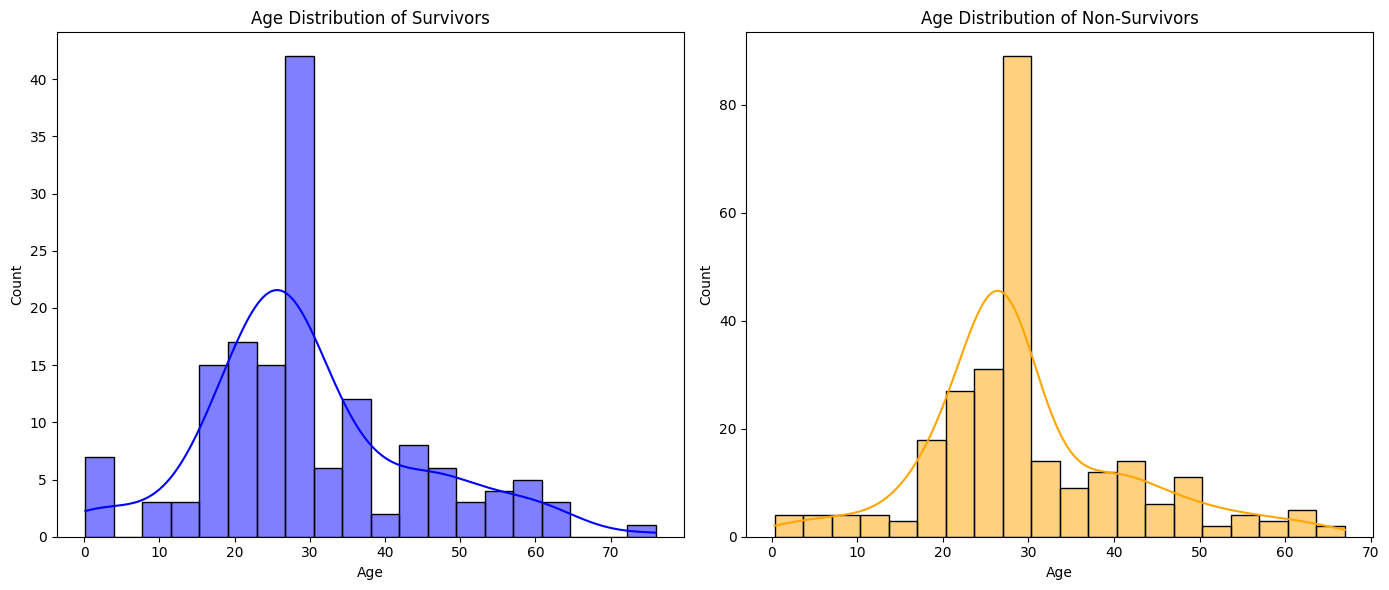

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив.
plt.figure(figsize=(14, 6))

# Гістограма для тих, хто вижив
plt.subplot(1, 2, 1)  
sns.histplot(titanic_selected[titanic_selected['Survived'] == 1]['Age'], color='blue', kde=True, bins=20)
plt.title('Age Distribution of Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

# Гістограма для тих, хто не вижив
plt.subplot(1, 2, 2)
sns.histplot(titanic_selected[titanic_selected['Survived'] == 0]['Age'], color='orange', kde=True, bins=20)
plt.title('Age Distribution of Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



На основі гістограм розподілу віку для тих, хто вижив, і тих, хто не вижив, спостерігаються такі видимі відмінності:
Гістограма для тих, хто вижив (синя) має значний пік у віковій групі 15-30 років. Це свідчить про те, що молодші пасажири мали вищий рівень виживання.
Гістограма для тих, хто не вижив (помаранчева) із суттєвою присутністю дорослих у вікових групах від 20 до 40 років. Це може свідчити про те, що пасажири середнього віку мали менше шансів на виживання, можливо через пріоритетне рятування дітей та жінок.


In [78]:
# 21. Обчисліть відсоток виживання для кожної комбінації статі та класу
survival_rate_by_sex_class = titanic_selected.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

# Визначення групи з найвищим рівнем виживання
print(survival_rate_by_sex_class.idxmax())
print(survival_rate_by_sex_class.max())


(1, 1)
100.0


In [79]:
# 22. Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare)
correlation_matrix = titanic_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()

# Змінні, які найбільш сильно корелюють з виживанням
print(correlation_matrix['Survived'].drop('Survived').idxmax())
print(correlation_matrix['Survived'].drop('Survived').max())

Fare
0.19203598394339086
